In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm

In [3]:
nome_arq = 'Dados airbnb - IA.xls'
df = pd.read_excel(nome_arq)
df.head(3)

,ID,ID da hospedagem,Nome da hospedagem,ID do Hospede,Nome do Hospede,Grupo de vizinhança,latitude,longitude,Tipo de hospedagem,Preço,locação mínima,Número de avaliações,Taxa mesal de ocupação,Número máximo de hóspedes,Disponibilidade anual
0,1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,4064749.0,-7397237,Quarto Privativo,125,1,9,0.21,6,365
1,2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,4075362.0,-7398377,Ap/Casa inteira,79,1,45,0.38,2,355
2,6,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,4074767.0,-73975,Ap/Casa inteira,60,3,74,0.59,1,129


In [5]:
df.columns

Index(['ID', 'ID da hospedagem', 'Nome da hospedagem', 'ID do Hospede',
       'Nome do Hospede', 'Grupo de vizinhança', 'latitude', 'longitude',
       'Tipo de hospedagem', 'Preço', 'locação mínima', 'Número de avaliações',
       'Taxa mesal de ocupação', 'Número máximo de hóspedes',
       'Disponibilidade anual'],
      dtype='object')

In [6]:
x_col = ['Preço', 'locação mínima', 'Número de avaliações',
       'Número máximo de hóspedes',
       'Disponibilidade anual']
y_col = ['Taxa mesal de ocupação']
X = df[x_col]
y = df[y_col]

In [8]:
df_quant = df[['Preço', 'locação mínima', 'Número de avaliações',
       'Taxa mesal de ocupação', 'Número máximo de hóspedes',
       'Disponibilidade anual']]
df_quant.columns

Index(['Preço', 'locação mínima', 'Número de avaliações',
       'Taxa mesal de ocupação', 'Número máximo de hóspedes',
       'Disponibilidade anual'],
      dtype='object')

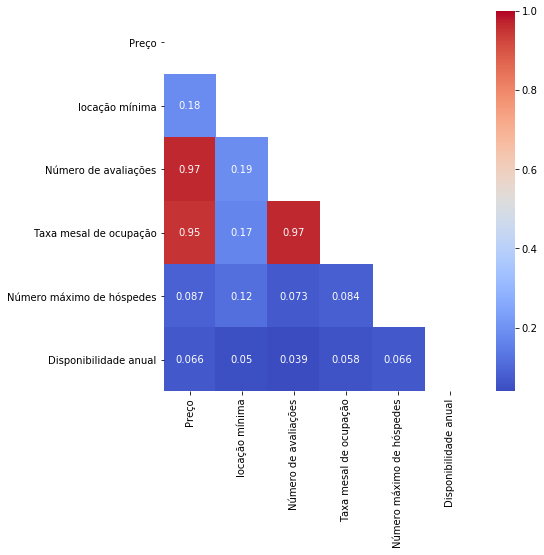

In [10]:
# matriz de correlação df_quant
fig, ax = plt.subplots(figsize=(7, 7)) 
mask = np.zeros_like(df_quant.corr().abs())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(df_quant.corr().abs(), mask= mask, ax= ax, cmap='coolwarm', annot= True)

In [11]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
modelfit = model.fit()
pred = modelfit.predict(X)
print(modelfit.summary())

                              OLS Regression Results                              
Dep. Variable:     Taxa mesal de ocupação   R-squared:                       0.944
Model:                                OLS   Adj. R-squared:                  0.943
Method:                     Least Squares   F-statistic:                     690.1
Date:                    Thu, 23 Apr 2020   Prob (F-statistic):          4.15e-126
Time:                            19:09:11   Log-Likelihood:                 316.28
No. Observations:                     211   AIC:                            -620.6
Df Residuals:                         205   BIC:                            -600.4
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

c:\users\marce\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
x_col = ['Preço', 'Número de avaliações']
X = df[x_col]

In [23]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
modelfit = model.fit()
pred = modelfit.predict(X)
print(modelfit.summary())

                              OLS Regression Results                              
Dep. Variable:     Taxa mesal de ocupação   R-squared:                       0.944
Model:                                OLS   Adj. R-squared:                  0.943
Method:                     Least Squares   F-statistic:                     1737.
Date:                    Thu, 23 Apr 2020   Prob (F-statistic):          1.57e-130
Time:                            19:29:36   Log-Likelihood:                 315.54
No. Observations:                     211   AIC:                            -625.1
Df Residuals:                         208   BIC:                            -615.0
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [26]:
X.head(2)

,const,Preço,Número de avaliações
0,1.0,125,9
1,1.0,79,45


In [31]:
modelfit.predict(np.array([1,80,40]))

array([0.43033917])

In [15]:
df.sample(5)

,ID,ID da hospedagem,Nome da hospedagem,ID do Hospede,Nome do Hospede,Grupo de vizinhança,latitude,longitude,Tipo de hospedagem,Preço,locação mínima,Número de avaliações,Taxa mesal de ocupação,Número máximo de hóspedes,Disponibilidade anual
69,179,45393,Greenwich Village Stylish Apartment,201297,Myrna,Manhattan,4073423.0,-740046,Ap/Casa inteira,85,26,38,0.36,1,225
141,392,120362,Williamsburg apartment right by the subway,138069,Itamar,Brooklyn,4070665.0,-7394061,Ap/Casa inteira,75,4,50,0.51,1,331
104,302,69921,Brooklyn Writer's Nook,155689,Joab,Brooklyn,4070514.0,-7391922,Quarto Privativo,79,5,47,0.49,1,203
118,331,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,4073842.0,-7395312,Quarto Privativo,140,3,2,0.02,28,60
99,292,67299,Cozy Garden Apartment in Williamsburg,330347,Adrienne,Brooklyn,4071492.0,-7396282,Ap/Casa inteira,70,30,56,0.56,1,42
